In [13]:
import muspy
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import tqdm
import IPython.display as ipd
import matplotlib.pyplot as plt

In [2]:
essen = muspy.EssenFolkSongDatabase("~/userdata/datasets/essen_folk/", download_and_extract=True)

Skip downloading as the `.muspy.success` file is found.
Skip extracting as the `.muspy.success` file is found.


In [3]:
essen.convert()

Skip conversion as the `.muspy.success` file is found.


EssenFolkSongDatabase(root=/home/teo/userdata/datasets/essen_folk)

In [11]:
type(essen[0])

muspy.music.Music

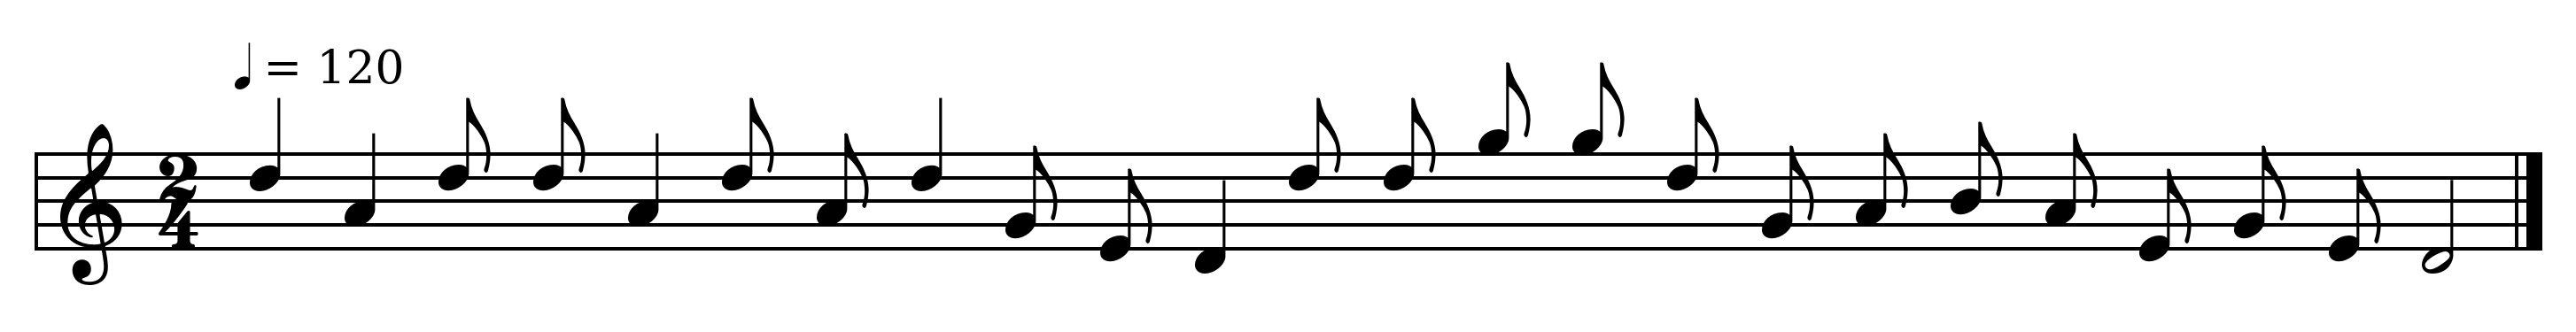

In [10]:
muspy.show_score(essen[2], figsize=(20,10))

In [12]:
muspy.write_audio('essen2.wav', essen[2])

In [14]:
ipd.Audio('essen2.wav')

In [15]:
entire_set = essen.to_pytorch_dataset(representation='note')
dataset = essen.to_pytorch_dataset(representation='note', splits=(0.6, 0.2, 0.2))
print( len(dataset['train']), len(dataset['validation']), len(dataset['test']) )

5420 1807 1807


In [16]:
dataset

{'train': TorchRepresentationDataset(dataset=EssenFolkSongDatabase(root=/home/teo/userdata/datasets/essen_folk), representation=note, subset=train),
 'test': TorchRepresentationDataset(dataset=EssenFolkSongDatabase(root=/home/teo/userdata/datasets/essen_folk), representation=note, subset=test),
 'validation': TorchRepresentationDataset(dataset=EssenFolkSongDatabase(root=/home/teo/userdata/datasets/essen_folk), representation=note, subset=validation)}

In [17]:
entire_set[0]

array([[   0,   74,   24,   64],
       [  24,   69,   12,   64],
       [  36,   72,   12,   64],
       [  48,   74,   24,   64],
       [  72,   74,   24,   64],
       [  96,   69,   18,   64],
       [ 114,   72,    6,   64],
       [ 120,   74,   12,   64],
       [ 132,   79,   12,   64],
       [ 144,   72,   12,   64],
       [ 156,   69,   12,   64],
       [ 168,   67,   24,   64],
       [ 192,   69,   18,   64],
       [ 210,   72,    6,   64],
       [ 216,   74,   12,   64],
       [ 228,   79,   12,   64],
       [ 240,   74,   12,   64],
       [ 252,   72,   24,   64],
       [ 276,   69,   12,   64],
       [ 288,   72,   18,   64],
       [ 306,   69,    6,   64],
       [ 312,   67,   12,   64],
       [ 324,   64,   12,   64],
       [ 336,   62,   48,   64],
       [ 384,   67,   12,   64],
       [ 396,   66,   12,   64],
       [ 408,   67,   24,   64],
       [ 432,   67,   18,   64],
       [ 450,   69,    6,   64],
       [ 456,   72,   12,   64],
       [ 4

In [21]:
embedding_test = nn.Embedding(20,5)

In [22]:
embedding_test.weight

Parameter containing:
tensor([[ 1.6649,  1.0636, -0.5096,  2.3963,  0.5069],
        [-0.1723, -0.0198, -0.3731, -0.5384, -0.4745],
        [ 0.0729,  0.0540, -0.4780, -0.2659, -0.5558],
        [-0.4931, -1.1625,  1.0436,  0.4495, -0.0856],
        [ 0.7399,  2.0588,  0.0815, -0.3597,  0.0646],
        [-1.0457, -0.3868,  0.2815,  0.4867,  0.5707],
        [ 0.0268, -1.0067,  0.4409,  0.8581, -1.2306],
        [ 0.3139,  0.0048,  0.2081, -1.1212, -0.1816],
        [ 1.8418,  1.0349, -1.3612,  0.6183,  1.2821],
        [-0.1015,  1.0788, -0.5592,  0.6596, -0.8460],
        [-0.9469, -0.4346, -0.8080, -0.0635, -0.5844],
        [-0.4623,  0.4416, -0.1897, -1.7871, -0.2415],
        [ 1.2440, -0.2583,  1.0908,  0.8010,  0.2905],
        [ 0.0162, -1.5748,  0.0862,  1.2289,  0.4793],
        [ 0.6608, -0.3999, -0.2853,  1.6200, -0.7659],
        [ 0.0107, -1.4137, -0.1887,  0.0264, -1.1339],
        [ 1.8050, -0.1806, -0.1397, -1.3106, -0.9687],
        [-0.6964, -0.1586, -0.9237,  0.9843

In [24]:
embedding_test(torch.LongTensor([1]))

tensor([[-0.1723, -0.0198, -0.3731, -0.5384, -0.4745]],
       grad_fn=<EmbeddingBackward0>)

In [25]:
unique_duration = set()
unique_pitch = set()
for item in entire_set:
  unique_duration = set(item[:,2]) | unique_duration
  unique_pitch = set(item[:,1])| unique_pitch
print(unique_duration)

{384, 2, 3, 4, 132, 6, 8, 9, 138, 264, 12, 15, 144, 16, 18, 21, 24, 156, 28, 30, 32, 288, 36, 168, 40, 42, 48, 1332, 54, 60, 64, 192, 66, 72, 78, 336, 84, 90, 96, 108, 240, 372, 120, 252}


In [26]:
print(unique_pitch)

{48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85}


In [27]:
print(sorted(list(unique_duration)))

[2, 3, 4, 6, 8, 9, 12, 15, 16, 18, 21, 24, 28, 30, 32, 36, 40, 42, 48, 54, 60, 64, 66, 72, 78, 84, 90, 96, 108, 120, 132, 138, 144, 156, 168, 192, 240, 252, 264, 288, 336, 372, 384, 1332]


In [30]:
class MelodyDataset:
  def __init__(self, dataset, unique_pitch, unique_duration ):
    self.data = dataset
    self.pitch_to_id = {pitch:i+1 for i, pitch in enumerate(sorted(list(unique_pitch)))}
    self.dur_to_id= {dur:i+1 for i, dur in enumerate(sorted(list(unique_duration)))}
    
  def __len__(self):
    return len(self.data)
  
  def __getitem__(self, idx):
    item = self.data[idx]
    dummy = torch.zeros(len(item), 2, dtype=torch.long)
    dummy[:,0] = torch.Tensor(np.vectorize(self.pitch_to_id.get)(item[:,1]))
    dummy[:,1] = torch.Tensor(np.vectorize(self.dur_to_id.get)(item[:,2]))
    return dummy

train_set = MelodyDataset(dataset['train'], unique_pitch, unique_duration)
valid_set = MelodyDataset(dataset['validation'], unique_pitch, unique_duration)
# print(dataset['train'][0])
# print(train_set[0])


In [34]:
def pad_collate(batch):
  return nn.utils.rnn.pad_sequence(batch, batch_first=True)

train_loader = DataLoader(train_set, batch_size=32, collate_fn=pad_collate, shuffle=True)

batch = next(iter(train_loader))
batch.shape

torch.Size([32, 106, 2])

In [35]:
batch[0]

tensor([[29,  7],
        [27, 12],
        [24,  4],
        [32,  4],
        [24,  4],
        [22,  4],
        [20,  4],
        [17,  4],
        [15,  7],
        [15,  4],
        [15,  4],
        [20, 10],
        [24,  4],
        [22,  7],
        [20,  4],
        [17,  4],
        [27, 19],
        [29,  7],
        [27, 12],
        [29,  4],
        [32,  4],
        [24,  4],
        [22,  4],
        [20,  4],
        [17,  4],
        [15,  7],
        [15,  4],
        [15,  4],
        [20, 10],
        [24,  4],
        [22,  7],
        [20,  4],
        [17,  4],
        [15, 19],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 

In [77]:
class MyFirstMusicGenerator(nn.Module):
  def __init__(self, num_pitches, num_durations, embedding_size, hidden_size):
    super().__init__()
    self.num_pitches = num_pitches
    
    self.pitch_embedding = nn.Embedding(num_embeddings=num_pitches, embedding_dim=embedding_size)
    self.duration_embedding = nn.Embedding(num_embeddings=num_durations, embedding_dim=embedding_size)
    
    self.rnn = nn.LSTM(embedding_size * 2, hidden_size, num_layers=3, batch_first=True) # N X T X C
    self.final_linear = nn.Linear(hidden_size, num_pitches+num_durations)

    
  def forward(self, x):
    pitch_emb = self.pitch_embedding(x[:,:,0])
    dur_emb = self.duration_embedding(x[:,:,1])
    
    concated_emb = torch.cat([pitch_emb, dur_emb], dim=-1)
    
    output, hidden_state = self.rnn(concated_emb)
    final_out = self.final_linear(output)
    pitch_output = torch.softmax(final_out[:,:,:num_pitches], dim=-1)
    duration_output = torch.softmax(final_out[:,:,num_pitches:], dim=-1)

    return torch.cat([pitch_output, duration_output], dim=-1)

num_pitches = len(unique_pitch) + 1
num_durations = len(unique_duration) + 1
  
model = MyFirstMusicGenerator(num_pitches, num_durations, embedding_size=27, hidden_size=64)

# print(batch.shape) # batch_size * num_notes * 2 (pitch, duration)
# print(batch[:,:,0])
# print(batch[:,:,1])

pitch_output, duration_output = model(batch)
batch[0]
# hidden_state[0].shape, hidden_state[1].shape

ValueError: too many values to unpack (expected 2)

In [62]:
num_pitches

39

In [78]:
def nll_loss(log_pred, target_idx, mask):
  log_pred = log_pred.view(-1, log_pred.shape[-1])
  loss = -log_pred[torch.arange(len(log_pred)), target_idx.view(-1)]
  loss *= mask.view(-1)
  return loss.mean()
  
def run_train_loop(model, optimizer, train_loader, loss_func, num_epochs, device):
  model= model.to(device)
  model.train()
  
  loss_record = []
  for epoch in tqdm.tqdm(range(num_epochs)):
    for x in train_loader:
      x = x.to(device)
      shifted_x = torch.zeros_like(x)
      shifted_x[:,:-1] = x[:,1:]
      est = model(x)
      log_est = torch.log(est+1e-8)
      mask = x[:,:,0]!=0
      loss = loss_func(log_est[:,:,:model.num_pitches], shifted_x[:,:,0], mask) \
            + loss_func(log_est[:,:,model.num_pitches:], shifted_x[:,:,1], mask) 
      optimizer.zero_grad()
      loss.backward()
      nn.utils.clip_grad_norm_(model.parameters(), 2.0)
      optimizer.step()
      loss_record.append(loss.item())
  return loss_record

model = MyFirstMusicGenerator(num_pitches, num_durations, 64, 512)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_func = torch.nn.NLLLoss()

loss = run_train_loop(model, optimizer, train_loader, nll_loss, 5, device='cuda')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:23<00:00,  4.75s/it]


In [69]:
x= batch
shifted_x = torch.zeros_like(x)
shifted_x[:,:-1] = x[:,1:]


In [71]:
x[0,:10]

tensor([[29,  7],
        [27, 12],
        [24,  4],
        [32,  4],
        [24,  4],
        [22,  4],
        [20,  4],
        [17,  4],
        [15,  7],
        [15,  4]])

In [72]:
shifted_x[0,:10]

tensor([[27, 12],
        [24,  4],
        [32,  4],
        [24,  4],
        [22,  4],
        [20,  4],
        [17,  4],
        [15,  7],
        [15,  4],
        [15,  4]])

In [75]:
(x[:,:,0]!=0).int()

tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]], dtype=torch.int32)

In [ ]:
def category_to_value(atensor, pitch_vocab, dur_vocab):
  dummy = np.zeros( [len(atensor), 4], np.int32)
  dummy[:,3] = 64
  dummy[:,1] = pitch_vocab[atensor[:,0].numpy()]
  dummy[:,2] = dur_vocab[atensor[:,1].numpy()]
  dummy[:,0] = np.cumsum(dummy[:,2])
  return dummy

item = batch[0]
pitch_vocab = np.asarray([0]+[k for k, v in train_set.pitch_to_id.items()])
dur_vocab = np.asarray([0]+[k for k, v in train_set.dur_to_id.items()])

recon_note_sequence = category_to_value(item, pitch_vocab, dur_vocab)
recon = muspy.from_note_representation(recon_note_sequence[:10])


In [ ]:
def generate(self, x, num_notes=50):
#     hidden_states = (torch.zeros(self.num_layers, self.hidden_size), torch.zeros(self.num_layers, self.hidden_size))
    pitch_embedding = self.pitch_embedding(x[..., 0])
    duration_embedding = self.duration_embedding(x[..., 1])
    concat_embedding = torch.cat([pitch_embedding, duration_embedding], dim=-1)

    final_hidden, hidden_states = self.rnn(concat_embedding)
    
    final_hidden = final_hidden[:,-1:]
    
    output_pitch_duration = []
    for i in range(num_notes):
      output = self.final_linear(final_hidden)
      pitch_output = torch.softmax(output[...,:self.num_pitches], dim=-1)
      dur_output = torch.softmax(output[...,self.num_pitches:], dim=-1)
      
      selected_pitch = pitch_output.squeeze().multinomial(num_samples=1)
      selected_duration = dur_output.squeeze().multinomial(num_samples=1)
      output_pitch_duration.append([selected_pitch, selected_duration])
      
      if selected_pitch==0 or selected_duration==0:
        break
    
      cur_pitch_embedding = self.pitch_embedding(selected_pitch)
      cur_duration_embedding = self.duration_embedding(selected_duration)
      cur_concat_embedding = torch.cat([cur_pitch_embedding, cur_duration_embedding], dim=-1).unsqueeze(0)
      final_hidden, hidden_states = self.rnn(cur_concat_embedding, hidden_states)
    
    return torch.LongTensor(output_pitch_duration)

model = model.to('cpu')
with torch.no_grad():
  generated_melody = generate(model, item[:10].unsqueeze(0))